Name: Ethan Paek & Brandon Quant

Date: 5/16/2020

Topic: COEN 140 Final Project

Description: Our final project is an implementation of a stock market predictor by utilizing Linear Regression, Ridge Regression, and Long Short Term Memory (LSTM).

Our datasets use historical stock prices from the following companies:

*   [Apple](https://finance.yahoo.com/quote/AAPL/history?period1=345427200&period2=1588723200&interval=1d&filter=history&frequency=1d)
*   [Intel](https://finance.yahoo.com/quote/INTC/history?period1=322099200&period2=1589587200&interval=1d&filter=history&frequency=1d) 
*   [Microsoft](https://finance.yahoo.com/quote/MSFT/history?period1=511056000&period2=1589587200&interval=1d&filter=history&frequency=1d)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd

###First thing to do is import our data

In [ ]:
# upload historical stock prices for Apple, Intel, and Microsoft
apple_data = pd.read_csv('final_project_data/AAPL.csv')
intel_data = pd.read_csv('final_project_data/INTC.csv')
microsoft_data = pd.read_csv('final_project_data/MSFT.csv')

print("Output of Apple's stock info:\n",apple_data.head())

Output of Apple's stock info:
        Date      Open      High       Low     Close  Adj Close     Volume
0  12/12/80  0.513393  0.515625  0.513393  0.513393   0.405683  117258400
1  12/15/80  0.488839  0.488839  0.486607  0.486607   0.384517   43971200
2  12/16/80  0.453125  0.453125  0.450893  0.450893   0.356296   26432000
3  12/17/80  0.462054  0.464286  0.462054  0.462054   0.365115   21610400
4  12/18/80  0.475446  0.477679  0.475446  0.475446   0.375698   18362400


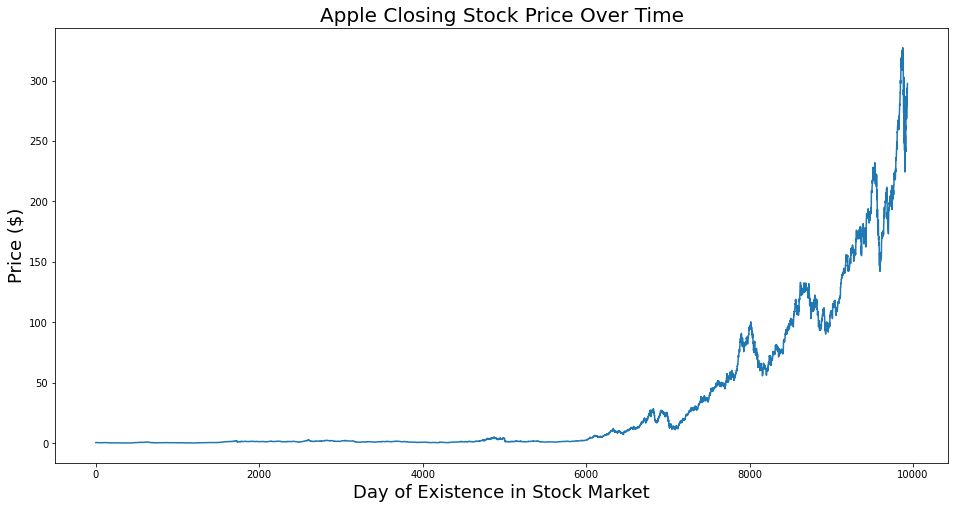

In [ ]:
# plot Apple historic closing prices
plt.figure(figsize=(16,8))
plt.xlabel('Day of Existence in Stock Market', fontsize=18)
plt.ylabel('Price ($)', fontsize=18)
plt.title("Apple Closing Stock Price Over Time", fontsize=20)
plt.plot(apple_data['Close'])

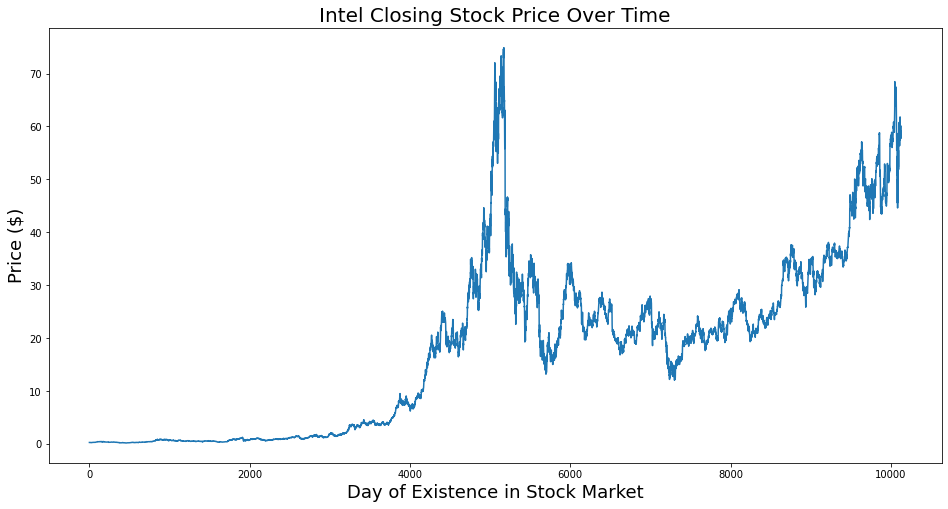

In [ ]:
# plot Intel historic closing prices
plt.figure(figsize=(16,8))
plt.xlabel('Day of Existence in Stock Market', fontsize=18)
plt.ylabel('Price ($)', fontsize=18)
plt.title("Intel Closing Stock Price Over Time", fontsize=20)
plt.plot(intel_data['Close'])

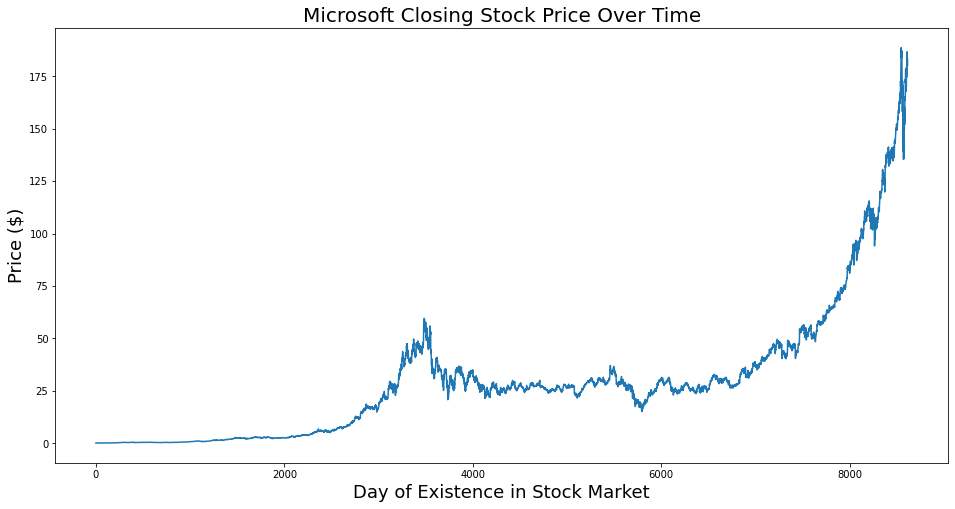

In [ ]:
# plot Microsoft historic closing prices
plt.figure(figsize=(16,8))
plt.xlabel('Day of Existence in Stock Market', fontsize=18)
plt.ylabel('Price ($)', fontsize=18)
plt.title("Microsoft Closing Stock Price Over Time", fontsize=20)
plt.plot(microsoft_data['Close'])

###Next, we need to split our datasets into training and testing subsets

In [ ]:
# split 80% of all individual datasets for training; 20% for testing
# split Apple's data:
apple_80_percent = round(apple_data.shape[0]*0.8)
train_apple = apple_data[:apple_80_percent]
test_apple = apple_data[apple_80_percent:]

print("Apple training set shape:",train_apple.shape)
print("Apple testing set shape:",test_apple.shape)

# split up our sets even further for predictions
x_train_apple = train_apple.drop('Close', axis=1)
# we can also drop date since our data is already sorted and want to only keep
# numerical data for simplicity
x_train_apple = x_train_apple.drop('Date', axis=1)
y_train_apple = train_apple['Close']

x_test_apple = test_apple.drop('Close', axis=1)
x_test_apple = x_test_apple.drop('Date', axis=1)
y_test_apple = test_apple['Close']

# we also have to convert from pandas type to numpy
x_train_apple = np.float64(x_train_apple)
y_train_apple = np.float64(y_train_apple)
x_test_apple = np.float64(x_test_apple)
y_test_apple = np.float64(y_test_apple)

# append 1s to the end of x_train and x_test subset
ones = np.ones(len(x_train_apple))
x_train_apple = np.column_stack((x_train_apple, ones))

ones = np.ones(len(x_test_apple))
x_test_apple = np.column_stack((x_test_apple, ones))

Apple training set shape: (7946, 7)
Apple testing set shape: (1986, 7)


In [ ]:
# split Intel's data:
intel_80_percent = round(intel_data.shape[0]*0.8)
train_intel = intel_data[:intel_80_percent]
test_intel = intel_data[intel_80_percent:]

print("Intel training set shape:",train_intel.shape)
print("Intel testing set shape:",test_intel.shape)

# split up our sets even further for predictions
x_train_intel = train_intel.drop('Close', axis=1)
x_train_intel = x_train_intel.drop('Date', axis=1)
y_train_intel = train_intel['Close']
x_test_intel = test_intel.drop('Close', axis=1)
x_test_intel = x_test_intel.drop('Date', axis=1)
y_test_intel = test_intel['Close']

# we also have to convert from pandas type to numpy
x_train_intel = np.float64(x_train_intel)
y_train_intel = np.float64(y_train_intel)
x_test_intel = np.float64(x_test_intel)
y_test_intel = np.float64(y_test_intel)

# append 1s to the end of x_train and x_test subset
ones = np.ones(len(x_train_intel))
x_train_intel = np.column_stack((x_train_intel, ones))

ones = np.ones(len(x_test_intel))
x_test_intel = np.column_stack((x_test_intel, ones))

Intel training set shape: (8103, 7)
Intel testing set shape: (2026, 7)


In [ ]:
# split Microsoft's data:
microsoft_80_percent = round(microsoft_data.shape[0]*0.8)
train_microsoft = microsoft_data[:microsoft_80_percent]
test_microsoft = microsoft_data[microsoft_80_percent:]

print("Microsoft training set shape:",train_microsoft.shape)
print("Microsoft testing set shape:",test_microsoft.shape)

# split up our sets even further for predictions
x_train_microsoft = train_microsoft.drop('Close', axis=1)
x_train_microsoft = x_train_microsoft.drop('Date', axis=1)
y_train_microsoft = train_microsoft['Close']
x_test_microsoft = test_microsoft.drop('Close', axis=1)
x_test_microsoft = x_test_microsoft.drop('Date', axis=1)
y_test_microsoft = test_microsoft['Close']

# we also have to convert from pandas type to numpy
x_train_microsoft = np.float64(x_train_microsoft)
y_train_microsoft = np.float64(y_train_microsoft)
x_test_microsoft = np.float64(x_test_microsoft)
y_test_microsoft = np.float64(y_test_microsoft)

# append 1s to the end of x_train and x_test subset
ones = np.ones(len(x_train_microsoft))
x_train_microsoft = np.column_stack((x_train_microsoft, ones))

ones = np.ones(len(x_test_microsoft))
x_test_microsoft = np.column_stack((x_test_microsoft, ones))

Microsoft training set shape: (6892, 7)
Microsoft testing set shape: (1723, 7)


### We also added 4 of our own columns of data as additional traits for our datasets to increase prediction accuracy

In [ ]:
def mean_of_last_7_days(closing_prices):
  # returns a full column of the mean from the last 7 days
  means = []
  for index in range(len(closing_prices) + 1):
    last_seven_days = index-7
    # for the first seven days, we can only use data up to the first day
    if (last_seven_days) < 0:
      last_seven_days = 0
    # skip the first index since closing_prices[0:0] would return an empty list
    if index == 0:
      continue
    else:
      means.append(np.mean(closing_prices[(last_seven_days):index], axis=0))
  return means

In [ ]:
def mean_of_last_30_days(closing_prices):
  # returns a full column of the mean from the last 7 days
  means = []
  for index in range(len(closing_prices) + 1):
    last_thirty_days = index-30
    # for the first thirty days, we can only use data up to the first day
    if (last_thirty_days) < 0:
      last_thirty_days = 0
    # skip the first index since closing_prices[0:0] would return an empty list
    if index == 0:
      continue
    else:
      means.append(np.mean(closing_prices[(last_thirty_days):index], axis=0))
  return means

In [ ]:
x_train_apple = np.column_stack((x_train_apple, mean_of_last_7_days(y_train_apple)))
x_train_apple = np.column_stack((x_train_apple, mean_of_last_30_days(y_train_apple)))
x_test_apple = np.column_stack((x_test_apple, mean_of_last_7_days(y_test_apple)))
x_test_apple = np.column_stack((x_test_apple, mean_of_last_30_days(y_test_apple)))

x_train_intel = np.column_stack((x_train_intel, mean_of_last_7_days(y_train_intel)))
x_train_intel = np.column_stack((x_train_intel, mean_of_last_30_days(y_train_intel)))
x_test_intel = np.column_stack((x_test_intel, mean_of_last_7_days(y_test_intel)))
x_test_intel = np.column_stack((x_test_intel, mean_of_last_30_days(y_test_intel)))

x_train_microsoft = np.column_stack((x_train_microsoft, mean_of_last_7_days(y_train_microsoft)))
x_train_microsoft = np.column_stack((x_train_microsoft, mean_of_last_30_days(y_train_microsoft)))
x_test_microsoft = np.column_stack((x_test_microsoft, mean_of_last_7_days(y_test_microsoft)))
x_test_microsoft = np.column_stack((x_test_microsoft, mean_of_last_30_days(y_test_microsoft)))

# check that our shape datasets now have 8 columns
print("X_train for Apple's new shape:", x_train_apple.shape)
print("X_test for Apple's new shape:", x_test_apple.shape)

X_train for Apple's new shape: (7946, 8)
X_test for Apple's new shape: (1986, 8)


In [ ]:
def calc_differenceslast7(closing_prices):
  # returns a full column of the mean from the last 7 days
    maxs = []
    mins = []
    for index in range(len(closing_prices)+1):
        index_last7 = index - 7
        if index_last7 < 0:
            index_last7 = 0
        if index == 0:
            continue
        maxs.append(np.max(closing_prices[(index_last7):index], axis=0))
        mins.append(np.min(closing_prices[(index_last7):index], axis=0))

    differences = []
    for i in range(len(maxs)):
      differences.append(maxs[i]-mins[i]) 
    return differences

In [ ]:
def calc_differenceslast30(closing_prices):
  # returns a full column of the mean from the last 7 days
    maxs = []
    mins = []
    for index in range(len(closing_prices)+1):
        index_last30 = index - 30
        if index_last30 < 0:
            index_last30 = 0
        if index == 0:
            continue
        maxs.append(np.max(closing_prices[(index_last30):index], axis=0))
        mins.append(np.min(closing_prices[(index_last30):index], axis=0))

    differences = []
    for i in range(len(maxs)):
      differences.append(maxs[i]-mins[i]) 
    return differences

In [ ]:
x_train_apple = np.column_stack((x_train_apple, calc_differenceslast7(y_train_apple)))
x_train_apple = np.column_stack((x_train_apple, calc_differenceslast30(y_train_apple)))
x_test_apple = np.column_stack((x_test_apple, calc_differenceslast7(y_test_apple)))
x_test_apple = np.column_stack((x_test_apple, calc_differenceslast30(y_test_apple)))

x_train_intel = np.column_stack((x_train_intel, calc_differenceslast7(y_train_intel)))
x_train_intel = np.column_stack((x_train_intel, calc_differenceslast30(y_train_intel)))
x_test_intel = np.column_stack((x_test_intel, calc_differenceslast7(y_test_intel)))
x_test_intel = np.column_stack((x_test_intel, calc_differenceslast30(y_test_intel)))

x_train_microsoft = np.column_stack((x_train_microsoft, calc_differenceslast7(y_train_microsoft)))
x_train_microsoft = np.column_stack((x_train_microsoft, calc_differenceslast30(y_train_microsoft)))
x_test_microsoft = np.column_stack((x_test_microsoft, calc_differenceslast7(y_test_microsoft)))
x_test_microsoft = np.column_stack((x_test_microsoft, calc_differenceslast30(y_test_microsoft)))

# check that our datasets now have 10 columns
print("X_train for Apple's new shape:", x_train_apple.shape)
print("X_test for Apple's new shape:", x_test_apple.shape)

X_train for Apple's new shape: (7946, 10)
X_test for Apple's new shape: (1986, 10)


In [ ]:
import math

# this function simply computs the root mean square error (RMSE) by taking in two parameters: the predicted outcome matrix and the actual outcome matrix
def RMSE(prediction, actual):
    N = len(actual)
    difference = prediction - actual
    total = 0
    
    for instance in difference:
        total += instance ** 2
        
    total_error = math.sqrt(total/N)
    return total_error

### We have created a simple benchmark to compare with our machine learning results by taking the average closing prices from the last 7 days

Training Benchmark RMSE for Apple is 1.0586561087224429
Testing Benchmark RMSE for Apple is 8.918539750511329


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


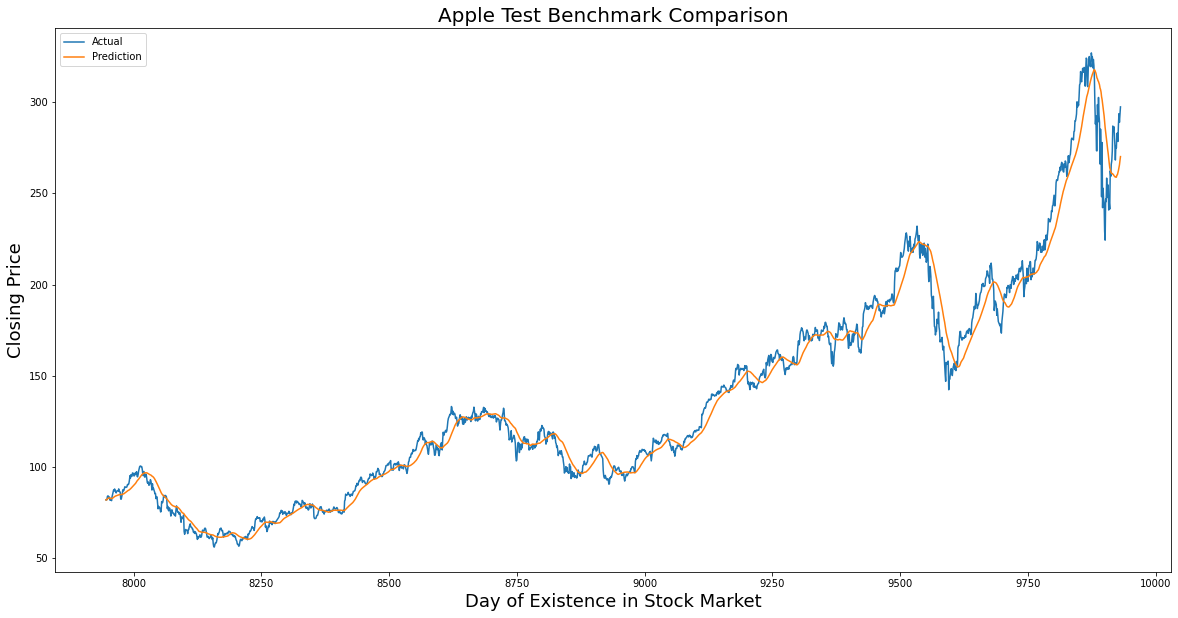

In [ ]:
# make predictions based on benchmark and calculate RMSE for training and testing data
apple_train_benchmark_pred = mean_of_last_30_days(y_train_apple)
apple_train_benchmark_RMSE = RMSE(apple_train_benchmark_pred, y_train_apple)
print("Training Benchmark RMSE for Apple is", apple_train_benchmark_RMSE)

apple_test_benchmark_pred = mean_of_last_30_days(y_test_apple)
apple_test_benchmark_RMSE = RMSE(apple_test_benchmark_pred, y_test_apple)
print("Testing Benchmark RMSE for Apple is", apple_test_benchmark_RMSE)

# need to initialize and append prediction values to our testing dataset
test_apple['Predictions'] = 0
test_apple['Predictions'] = apple_test_benchmark_pred

# plot our results
plt.figure(figsize=(20,10))
plt.xlabel("Day of Existence in Stock Market", fontsize=18)
plt.ylabel("Closing Price", fontsize=18)
plt.title("Apple Test Benchmark Comparison", fontsize=20)
plt.plot(test_apple['Close'], label='Actual')
plt.plot(test_apple['Predictions'], label='Prediction')
plt.legend()

Training Benchmark RMSE for Intel is 1.6707384762979562
Testing Benchmark RMSE for Intel is 2.09502704316072


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


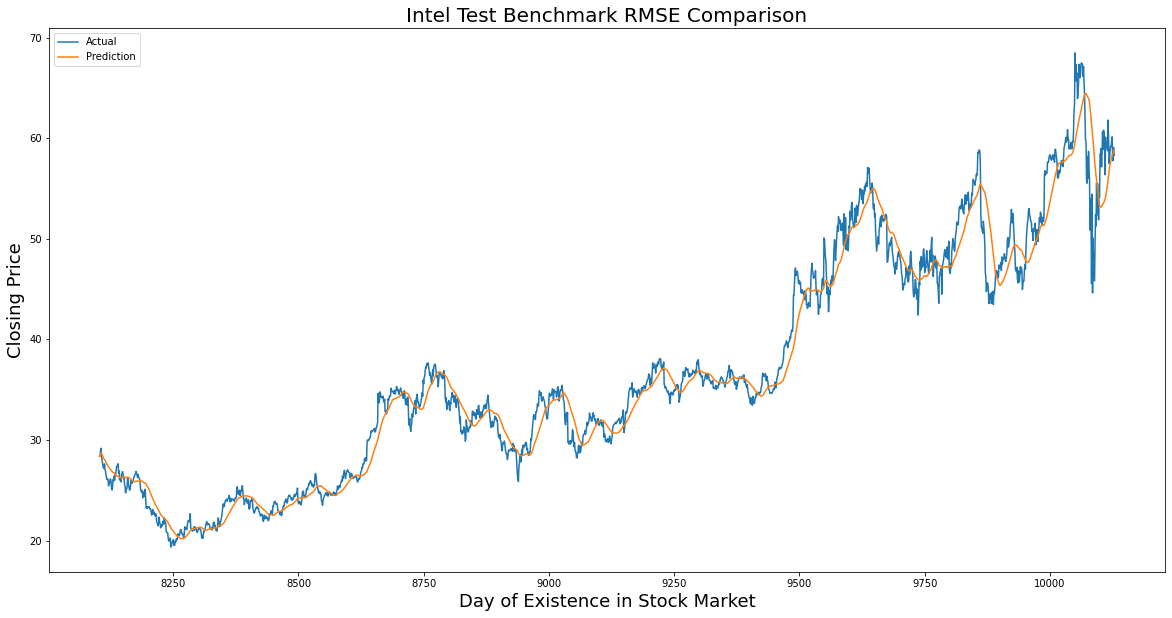

In [ ]:
intel_train_benchmark_pred = mean_of_last_30_days(y_train_intel)
intel_train_benchmark_RMSE = RMSE(intel_train_benchmark_pred, y_train_intel)
print("Training Benchmark RMSE for Intel is", intel_train_benchmark_RMSE)

intel_test_benchmark_pred = mean_of_last_30_days(y_test_intel)
intel_test_benchmark_RMSE = RMSE(intel_test_benchmark_pred, y_test_intel)
print("Testing Benchmark RMSE for Intel is", intel_test_benchmark_RMSE)

test_intel['Predictions'] = 0
test_intel['Predictions'] = intel_test_benchmark_pred

plt.figure(figsize=(20,10))
plt.xlabel("Day of Existence in Stock Market", fontsize=18)
plt.ylabel("Closing Price", fontsize=18)
plt.title("Intel Test Benchmark Comparison", fontsize=20)
plt.plot(test_intel['Close'], label='Actual')
plt.plot(test_intel['Predictions'], label='Prediction')
plt.legend()

Training Benchmark RMSE for Microsoft is 1.482676788876623
Testing Benchmark RMSE for Microsoft is 4.197202004134435


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


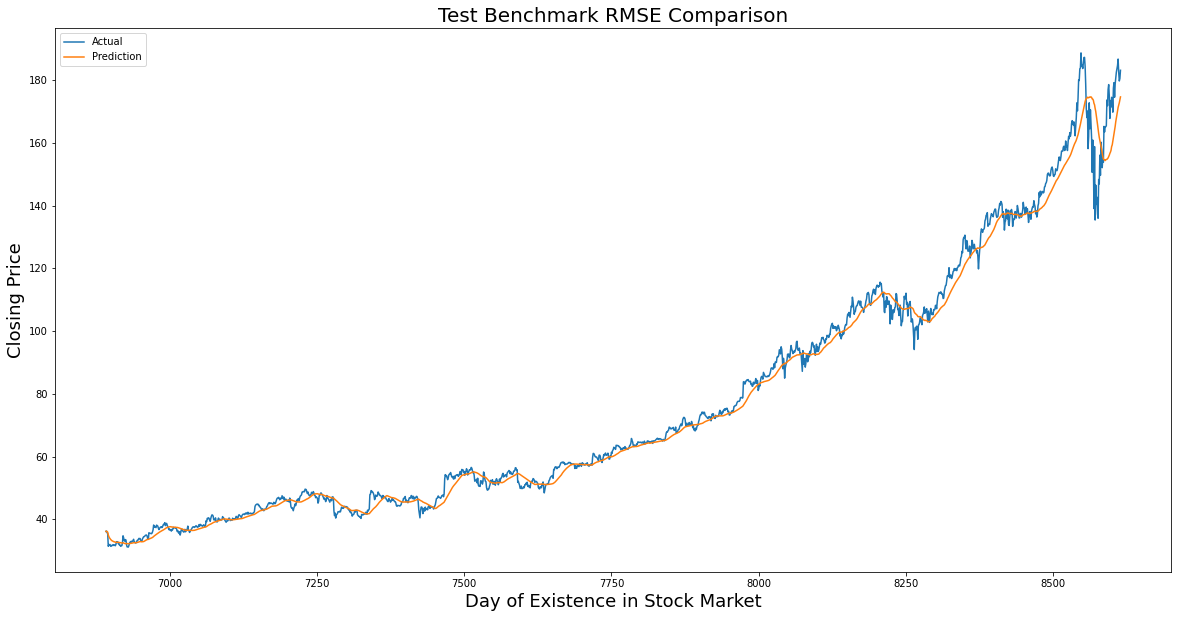

In [ ]:
microsoft_train_benchmark_pred = mean_of_last_30_days(y_train_microsoft)
microsoft_train_benchmark_RMSE = RMSE(microsoft_train_benchmark_pred, y_train_microsoft)
print("Training Benchmark RMSE for Microsoft is", microsoft_train_benchmark_RMSE)

microsoft_test_benchmark_pred = mean_of_last_30_days(y_test_microsoft)
microsoft_test_benchmark_RMSE = RMSE(microsoft_test_benchmark_pred, y_test_microsoft)
print("Testing Benchmark RMSE for Microsoft is", microsoft_test_benchmark_RMSE)

test_microsoft['Predictions'] = 0
test_microsoft['Predictions'] = microsoft_test_benchmark_pred

plt.figure(figsize=(20,10))
plt.xlabel("Day of Existence in Stock Market", fontsize=18)
plt.ylabel("Closing Price", fontsize=18)
plt.title("Microsoft Test Benchmark Comparison", fontsize=20)
plt.plot(test_microsoft['Close'], label='Actual')
plt.plot(test_microsoft['Predictions'], label='Prediction')
plt.legend()

###Now, we can begin to implement Linear Regression

In [ ]:
# perform linear regression and return list of predicted outcomes that each correspond to their actual values
def linear_regression(x, y, samples):
    left = np.linalg.inv(np.dot(x.T, x))
    right = np.dot(x.T, y)
    w = np.dot(left, right)
    prediction = []
    
    for Xtest in samples:
        prediction.append(np.dot(Xtest.T, w))
        
    return prediction

Training Linear Regression RMSE for Apple is 0.03428569099022709
Testing Linear Regression RMSE for Apple is 16.450180700071552


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


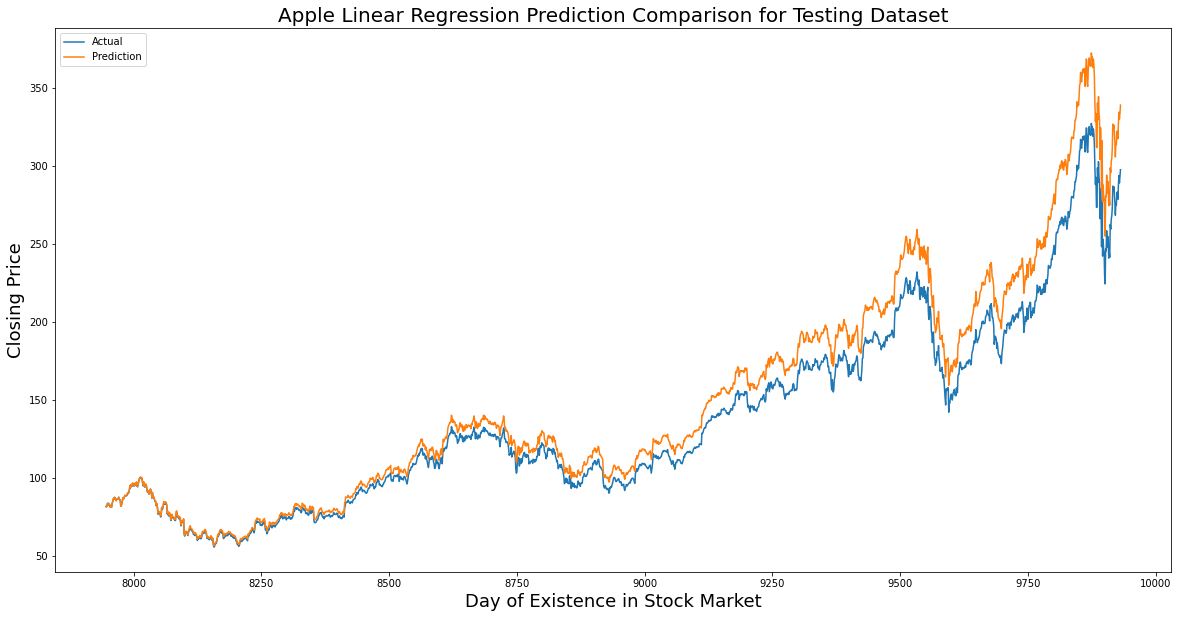

In [ ]:
# make predictions based on linear regression and calculate RMSE for training and testing data
apple_train_linear_prediction = linear_regression(x_train_apple, y_train_apple, x_train_apple)
apple_train_linear_RMSE = RMSE(apple_train_linear_prediction, y_train_apple)
print("Training Linear Regression RMSE for Apple is", apple_train_linear_RMSE)

apple_test_linear_prediction = linear_regression(x_train_apple,y_train_apple,x_test_apple)
apple_test_linear_RMSE = RMSE(apple_test_linear_prediction, y_test_apple)
print("Testing Linear Regression RMSE for Apple is", apple_test_linear_RMSE)

# need to replace prediction values to our testing dataset
test_apple['Predictions'] = apple_test_linear_prediction

plt.figure(figsize=(20,10))
plt.xlabel("Day of Existence in Stock Market", fontsize=18)
plt.ylabel("Closing Price", fontsize=18)
plt.title("Apple Linear Regression Prediction Comparison for Testing Dataset", fontsize=20)
plt.plot(test_apple['Close'], label='Actual')
plt.plot(test_apple['Predictions'], label='Prediction')
plt.legend()

Training Linear Regression RMSE for Intel is 0.20264038160338577
Testing Linear Regression RMSE for Intel is 0.7504907132668726


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


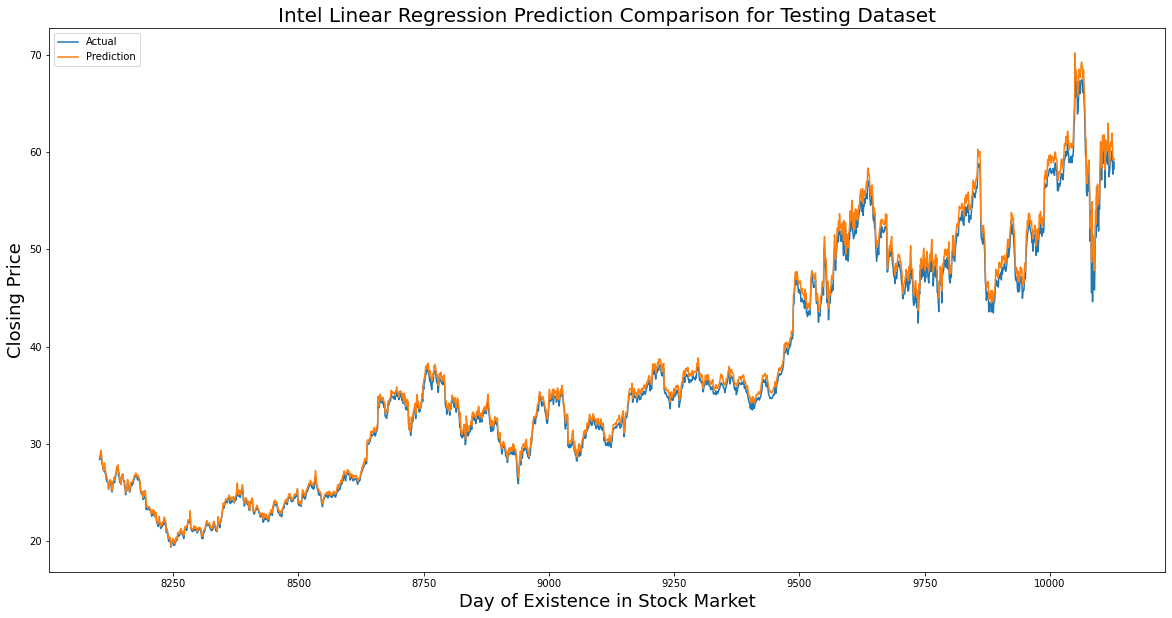

In [ ]:
intel_train_linear_prediction = linear_regression(x_train_intel, y_train_intel, x_train_intel)
intel_train_linear_RMSE = RMSE(intel_train_linear_prediction, y_train_intel)
print("Training Linear Regression RMSE for Intel is", intel_train_linear_RMSE)

intel_test_linear_prediction = linear_regression(x_train_intel,y_train_intel,x_test_intel)
intel_test_linear_RMSE = RMSE(intel_test_linear_prediction, y_test_intel)
print("Testing Linear Regression RMSE for Intel is", intel_test_linear_RMSE)

test_intel['Predictions'] = intel_test_linear_prediction

plt.figure(figsize=(20,10))
plt.xlabel("Day of Existence in Stock Market", fontsize=18)
plt.ylabel("Closing Price", fontsize=18)
plt.title("Intel Linear Regression Prediction Comparison for Testing Dataset", fontsize=20)
plt.plot(test_intel['Close'], label='Actual')
plt.plot(test_intel['Predictions'], label='Prediction')
plt.legend()

Training Linear Regression RMSE for Microsoft is 0.18009810328981302
Testing Linear Regression RMSE for Microsoft is 0.6454002026020877


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


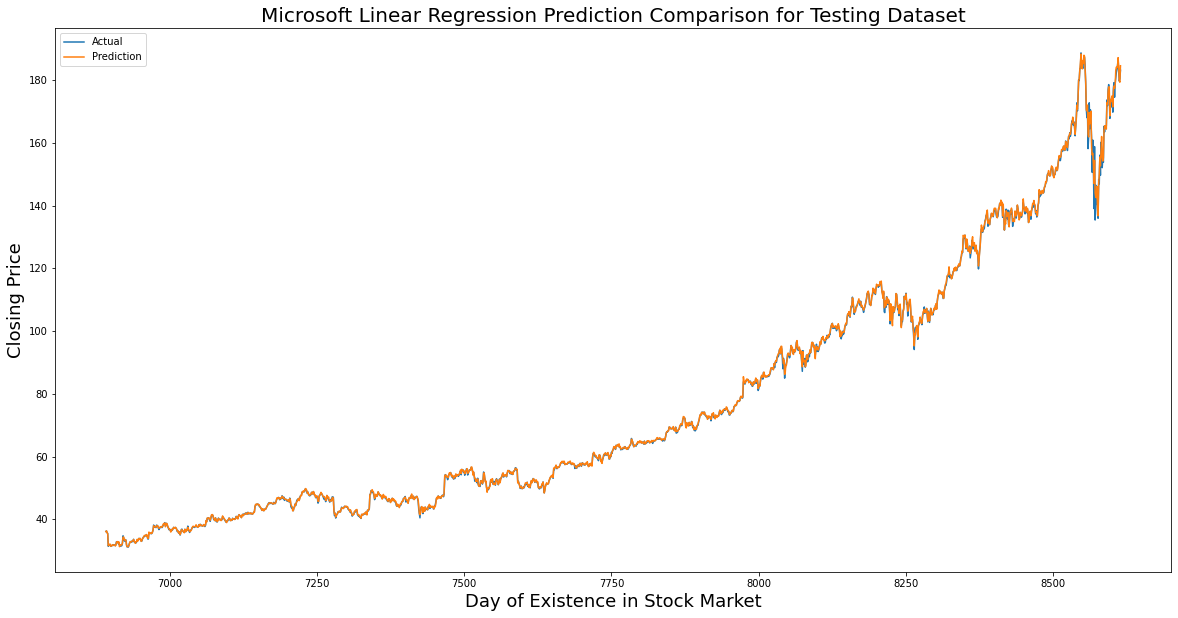

In [ ]:
microsoft_train_linear_prediction = linear_regression(x_train_microsoft, y_train_microsoft, x_train_microsoft)
microsoft_train_linear_RMSE = RMSE(microsoft_train_linear_prediction, y_train_microsoft)
print("Training Linear Regression RMSE for Microsoft is", microsoft_train_linear_RMSE)

microsoft_test_linear_prediction = linear_regression(x_train_microsoft,y_train_microsoft,x_test_microsoft)
microsoft_test_linear_RMSE = RMSE(microsoft_test_linear_prediction, y_test_microsoft)
print("Testing Linear Regression RMSE for Microsoft is", microsoft_test_linear_RMSE)

test_microsoft['Predictions'] = microsoft_test_linear_prediction

plt.figure(figsize=(20,10))
plt.xlabel("Day of Existence in Stock Market", fontsize=18)
plt.ylabel("Closing Price", fontsize=18)
plt.title("Microsoft Linear Regression Prediction Comparison for Testing Dataset", fontsize=20)
plt.plot(test_microsoft['Close'], label='Actual')
plt.plot(test_microsoft['Predictions'], label='Prediction')
plt.legend()

In [ ]:
# perform ridge regression and return list of predicted outcomes that each correspond to their actual values
def ridge_regression(X,Y,data,Lambda):
    w = np.dot((np.linalg.inv(np.dot(X.T,X) + Lambda*np.identity(len(X.T)))),(np.dot(X.T,Y)))
    prediction_y = []
    for x in data:
        prediction_y.append(np.dot(x.T,w))
    return prediction_y

In [ ]:
# perform K-fold cross-validation to find optimal lambda on training and testing datasets
def kfold(x_train, y_train, x_test, y_test):
  Lambda = 50
  RMSEs = np.zeros((15,5))
  Min = 0
  for i in range(15):
      for k in range(5):
          xTrain_kfold = np.concatenate((x_train[0:int(k*(len(x_train)/5))], x_train[int((k+1)*(len(x_train)/5)):int(len(x_train))]))
          yTrain_kfold = np.concatenate((y_train[0:int(k*(len(y_train)/5))], y_train[int((k+1)*(len(y_train)/5)):int(len(y_train))]))
          
          xTest_kfold = x_train[int(k*(len(x_train)/5)):int((k+1)*(len(x_train)/5))]
          yTest_kfold = y_train[int(k*(len(y_train)/5)):int((k+1)*(len(y_train)/5))]

          prediction = ridge_regression(xTrain_kfold, yTrain_kfold, xTest_kfold, Lambda)
          RMSEs[i, k] = RMSE(prediction, yTest_kfold)
      Lambda /= 2

  for i in range(14):
      if (sum(RMSEs[i+1]) / 5) < (sum(RMSEs[Min]) / 5):
          Min = i + 1

  opt_lambda = 50 / (2 ** Min)
  return opt_lambda

In [ ]:
# find the optimal lambdas for each of our stock datasets
opt_lambda_apple = kfold(x_train_apple, y_train_apple, x_test_apple, y_test_apple)
opt_lambda_intel = kfold(x_train_intel, y_train_intel, x_test_intel, y_test_intel)
opt_lambda_microsoft = kfold(x_train_microsoft, y_train_microsoft, x_test_microsoft, y_test_microsoft)

print("Optimal Lambda for Apple Dataset:", opt_lambda_apple)
print("Optimal Lambda for Intel Dataset:",opt_lambda_intel)
print("Optimal Lambda for Microsoft Dataset:",opt_lambda_microsoft)

Optimal Lambda for Apple Dataset: 1.5625
Optimal Lambda for Intel Dataset: 50.0
Optimal Lambda for Microsoft Dataset: 0.0030517578125


Training Ridge Regression RMSE for Apple is 0.03432655535677372
Testing Ridge Regression RMSE for Apple is 16.20467612249307


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


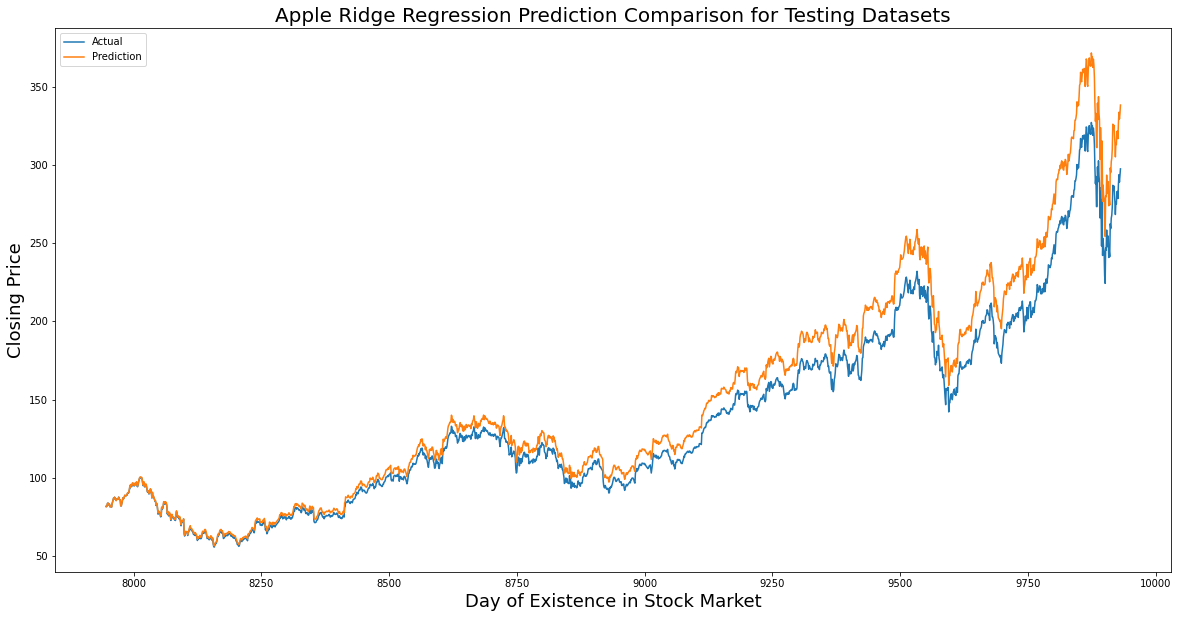

In [ ]:
apple_train_ridge_prediction = ridge_regression(x_train_apple, y_train_apple, x_train_apple, opt_lambda_apple)
apple_train_ridge_RMSE = RMSE(apple_train_ridge_prediction, y_train_apple)
print("Training Ridge Regression RMSE for Apple is", apple_train_ridge_RMSE)

apple_test_ridge_prediction = ridge_regression(x_train_apple,y_train_apple,x_test_apple, opt_lambda_apple)
apple_test_ridge_RMSE = RMSE(apple_test_ridge_prediction, y_test_apple)
print("Testing Ridge Regression RMSE for Apple is", apple_test_ridge_RMSE)

test_apple['Predictions'] = apple_test_ridge_prediction

plt.figure(figsize=(20,10))
plt.xlabel("Day of Existence in Stock Market", fontsize=18)
plt.ylabel("Closing Price", fontsize=18)
plt.title("Apple Ridge Regression Prediction Comparison for Testing Datasets", fontsize=20)
plt.plot(test_apple['Close'], label='Actual')
plt.plot(test_apple['Predictions'], label='Prediction')
plt.legend()

Training Ridge Regression RMSE for Intel is 0.2049998653415787
Testing Ridge Regression RMSE for Intel is 0.8657445531919906


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


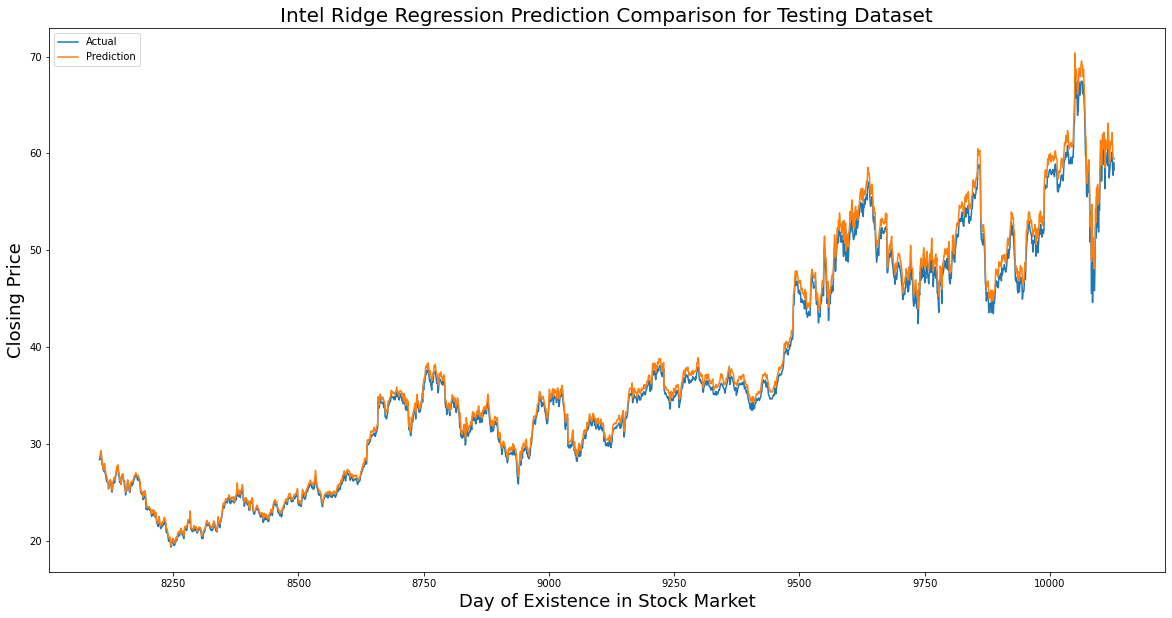

In [ ]:
intel_train_ridge_prediction = ridge_regression(x_train_intel, y_train_intel, x_train_intel, opt_lambda_intel)
intel_train_ridge_RMSE = RMSE(intel_train_ridge_prediction, y_train_intel)
print("Training Ridge Regression RMSE for Intel is", intel_train_ridge_RMSE)

intel_test_ridge_prediction = ridge_regression(x_train_intel,y_train_intel,x_test_intel, opt_lambda_intel)
intel_test_ridge_RMSE = RMSE(intel_test_ridge_prediction, y_test_intel)
print("Testing Ridge Regression RMSE for Intel is", intel_test_ridge_RMSE)

test_intel['Predictions'] = intel_test_ridge_prediction

plt.figure(figsize=(20,10))
plt.xlabel("Day of Existence in Stock Market", fontsize=18)
plt.ylabel("Closing Price", fontsize=18)
plt.title("Intel Ridge Regression Prediction Comparison for Testing Dataset", fontsize=20)
plt.plot(test_intel['Close'], label='Actual')
plt.plot(test_intel['Predictions'], label='Prediction')
plt.legend()

Training Ridge Regression Microsoft is 0.18009810331075057
Testing Ridge Regression RMSE for Microsoft is 0.6454018330179357


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


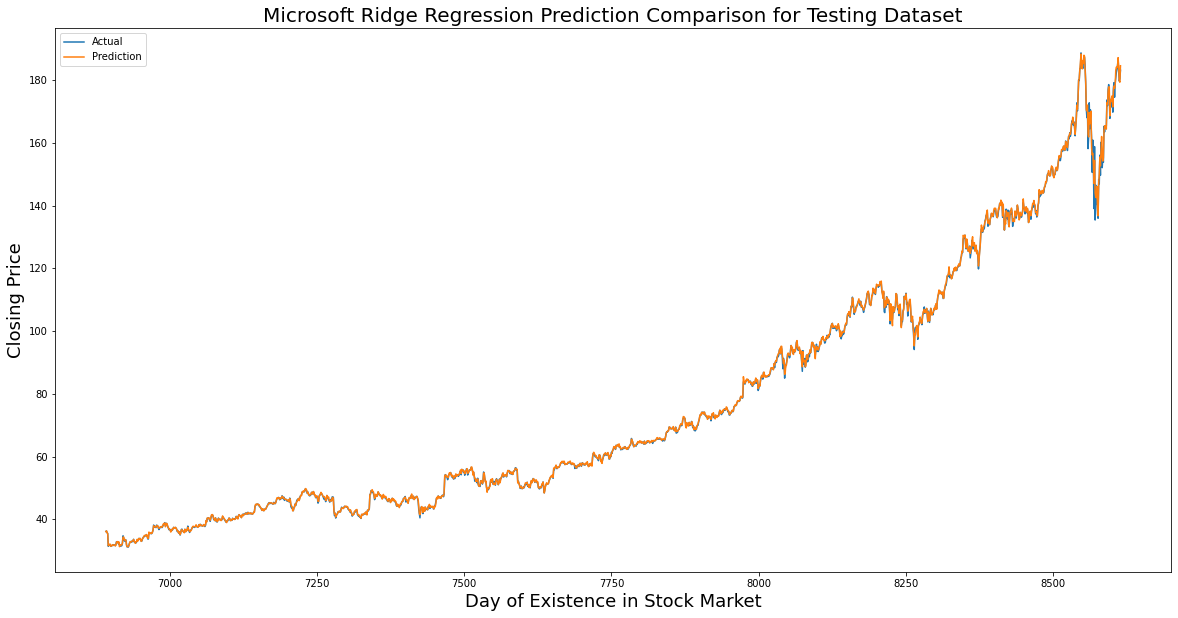

In [ ]:
microsoft_train_ridge_prediction = ridge_regression(x_train_microsoft, y_train_microsoft, x_train_microsoft, opt_lambda_microsoft)
microsoft_train_ridge_RMSE = RMSE(microsoft_train_ridge_prediction, y_train_microsoft)
print("Training Ridge Regression Microsoft is", microsoft_train_ridge_RMSE)

microsoft_test_ridge_prediction = ridge_regression(x_train_microsoft,y_train_microsoft,x_test_microsoft, opt_lambda_microsoft)
microsoft_test_ridge_RMSE = RMSE(microsoft_test_ridge_prediction, y_test_microsoft)
print("Testing Ridge Regression RMSE for Microsoft is", microsoft_test_ridge_RMSE)

test_microsoft['Predictions'] = microsoft_test_ridge_prediction

plt.figure(figsize=(20,10))
plt.xlabel("Day of Existence in Stock Market", fontsize=18)
plt.ylabel("Closing Price", fontsize=18)
plt.title("Microsoft Ridge Regression Prediction Comparison for Testing Dataset", fontsize=20)
plt.plot(test_microsoft['Close'], label='Actual')
plt.plot(test_microsoft['Predictions'], label='Prediction')
plt.legend()

### Implement Long Short Term Memory (LSTM)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# retrieve the values of all Close prices from Apple stock
apple_dataset = apple_data.filter(["Close"]).values

# scale our data for LSTM
scaler = MinMaxScaler(feature_range=(0,1))
apple_scaled_data = scaler.fit_transform(apple_dataset)

print(apple_scaled_data)

[[9.69298248e-04]
 [8.87384772e-04]
 [7.78168843e-04]
 ...
 [8.83395758e-01]
 [8.95903257e-01]
 [9.09358749e-01]]


In [ ]:
# create the scaled training data set
apple_LSTM_train_data = apple_scaled_data[0:int(apple_80_percent), :]

# split the data into x_train and y_train data sets
apple_LSTM_x_train = []
apple_LSTM_y_train = []

# create data in 60 timesteps
for i in range(60, len(apple_LSTM_train_data)):
    apple_LSTM_x_train.append(apple_LSTM_train_data[i-60:i, 0])
    apple_LSTM_y_train.append(apple_LSTM_train_data[i, 0])

In [ ]:
# Convert the training sets to numpy arrays 
apple_LSTM_x_train, apple_LSTM_y_train = np.array(apple_LSTM_x_train), np.array(apple_LSTM_y_train)

# convert the data into a 3D dimension array with x_train samples, 60 timestamps (to base data off past 60 days), and one feature at each step
apple_LSTM_x_train = np.reshape(apple_LSTM_x_train, (apple_LSTM_x_train.shape[0], apple_LSTM_x_train.shape[1], 1))
apple_LSTM_x_train.shape

(7886, 60, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# build the LSTM model
apple_model = Sequential()
apple_model.add(LSTM(50, return_sequences=True, input_shape=(apple_LSTM_x_train.shape[1], 1)))
apple_model.add(LSTM(50, return_sequences= False))
apple_model.add(Dense(25))
apple_model.add(Dense(1))

Using TensorFlow backend.


In [ ]:
# compile the model
apple_model.compile(optimizer='adam', loss='mean_squared_error')

# train the model
apple_model.fit(apple_LSTM_x_train, apple_LSTM_y_train, batch_size=1, epochs=1)

Epoch 1/1
7886/7886 [==============================] - 297s 38ms/step - loss: 5.0244e-05


In [ ]:
# create the scaled Apple testing data set
apple_LSTM_test_data = apple_scaled_data[apple_80_percent - 60: , :]
apple_LSTM_x_test = []
apple_LSTM_y_test = apple_dataset[apple_80_percent:, :]
for i in range(60, len(apple_LSTM_test_data)):
    apple_LSTM_x_test.append(apple_LSTM_test_data[i-60:i, 0])

Testing LSTM RMSE for Apple is 4.427043687607912


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


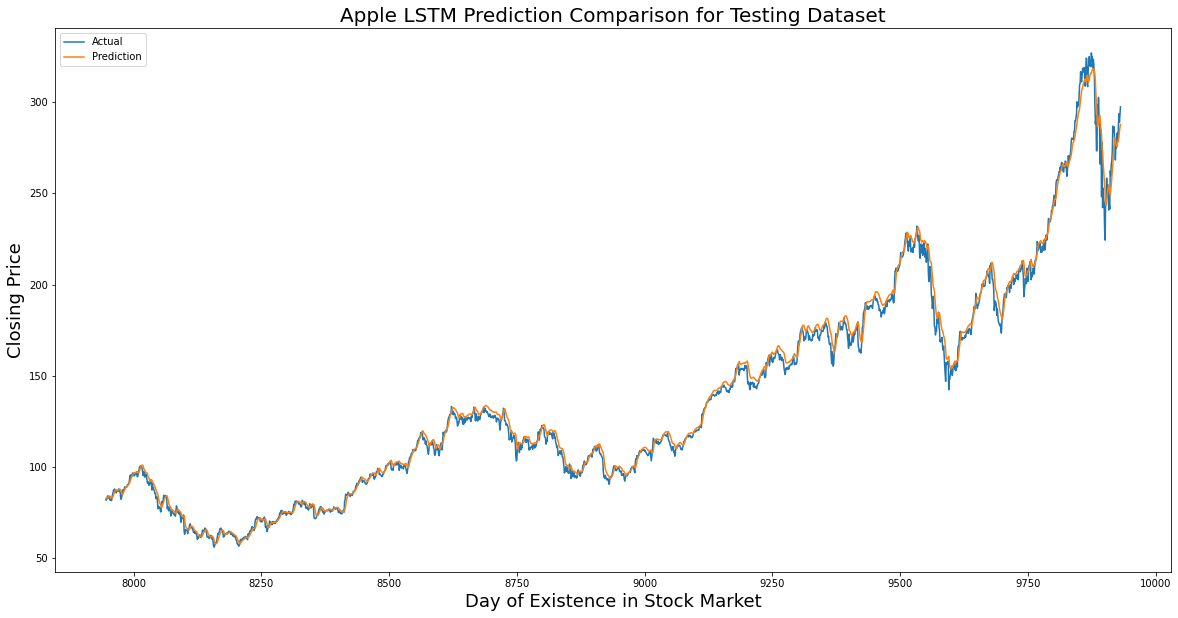

In [ ]:
# convert the data to a numpy array
apple_LSTM_x_test = np.array(apple_LSTM_x_test)

# reshape the data
apple_LSTM_x_test = np.reshape(apple_LSTM_x_test, (apple_LSTM_x_test.shape[0], apple_LSTM_x_test.shape[1], 1 ))

# Get the models predicted price values 
apple_LSTM_test_predictions = apple_model.predict(apple_LSTM_x_test)
apple_LSTM_test_predictions = scaler.inverse_transform(apple_LSTM_test_predictions)

apple_LSTM_RMSE = RMSE(apple_LSTM_test_predictions, apple_LSTM_y_test)
print("Testing LSTM RMSE for Apple is", apple_LSTM_RMSE)
#predictions = scaler.inverse_transform(predictions)

test_apple['Predictions'] = apple_LSTM_test_predictions

plt.figure(figsize=(20,10))
plt.xlabel("Day of Existence in Stock Market", fontsize=18)
plt.ylabel("Closing Price", fontsize=18)
plt.title("Apple LSTM Prediction Comparison for Testing Dataset", fontsize=20)
plt.plot(test_apple['Close'], label='Actual')
plt.plot(test_apple['Predictions'], label='Prediction')
plt.legend()

In [ ]:
# next, we run LSTM on Intel's data
intel_dataset = intel_data.filter(["Close"]).values

# scale our data for LSTM
scaler = MinMaxScaler(feature_range=(0,1))
intel_scaled_data = scaler.fit_transform(intel_dataset)

print(intel_scaled_data)

[[0.001465  ]
 [0.00143012]
 [0.00153475]
 ...
 [0.77048941]
 [0.78843771]
 [0.77772226]]


In [ ]:
# create the scaled training data set
intel_LSTM_train_data = intel_scaled_data[0:int(intel_80_percent), :]

# split the data into x_train and y_train data sets
intel_LSTM_x_train = []
intel_LSTM_y_train = []

# create data in 60 timesteps
for i in range(60, len(intel_LSTM_train_data)):
    intel_LSTM_x_train.append(intel_LSTM_train_data[i-60:i, 0])
    intel_LSTM_y_train.append(intel_LSTM_train_data[i, 0])

In [ ]:
# Convert the training sets to numpy arrays 
intel_LSTM_x_train, intel_LSTM_y_train = np.array(intel_LSTM_x_train), np.array(intel_LSTM_y_train)

# convert the data into a 3D dimension array with x_train samples, 60 timestamps, and one feature at each step
intel_LSTM_x_train = np.reshape(intel_LSTM_x_train, (intel_LSTM_x_train.shape[0], intel_LSTM_x_train.shape[1], 1))
intel_LSTM_x_train.shape

(8043, 60, 1)

In [ ]:
# build the LSTM model
intel_model = Sequential()
intel_model.add(LSTM(50, return_sequences=True, input_shape=(intel_LSTM_x_train.shape[1], 1)))
intel_model.add(LSTM(50, return_sequences= False))
intel_model.add(Dense(25))
intel_model.add(Dense(1))

In [ ]:
# compile the model
intel_model.compile(optimizer='adam', loss='mean_squared_error')

# train the model
intel_model.fit(intel_LSTM_x_train, intel_LSTM_y_train, batch_size=1, epochs=1)

Epoch 1/1
8043/8043 [==============================] - 303s 38ms/step - loss: 5.5469e-04


In [ ]:
# create the scaled Intel testing data set
intel_LSTM_test_data = intel_scaled_data[intel_80_percent - 60: , :]
intel_LSTM_x_test = []
intel_LSTM_y_test = intel_dataset[intel_80_percent:, :]
for i in range(60, len(intel_LSTM_test_data)):
    intel_LSTM_x_test.append(intel_LSTM_test_data[i-60:i, 0])

Testing LSTM RMSE for intel is 0.9206032313038828


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


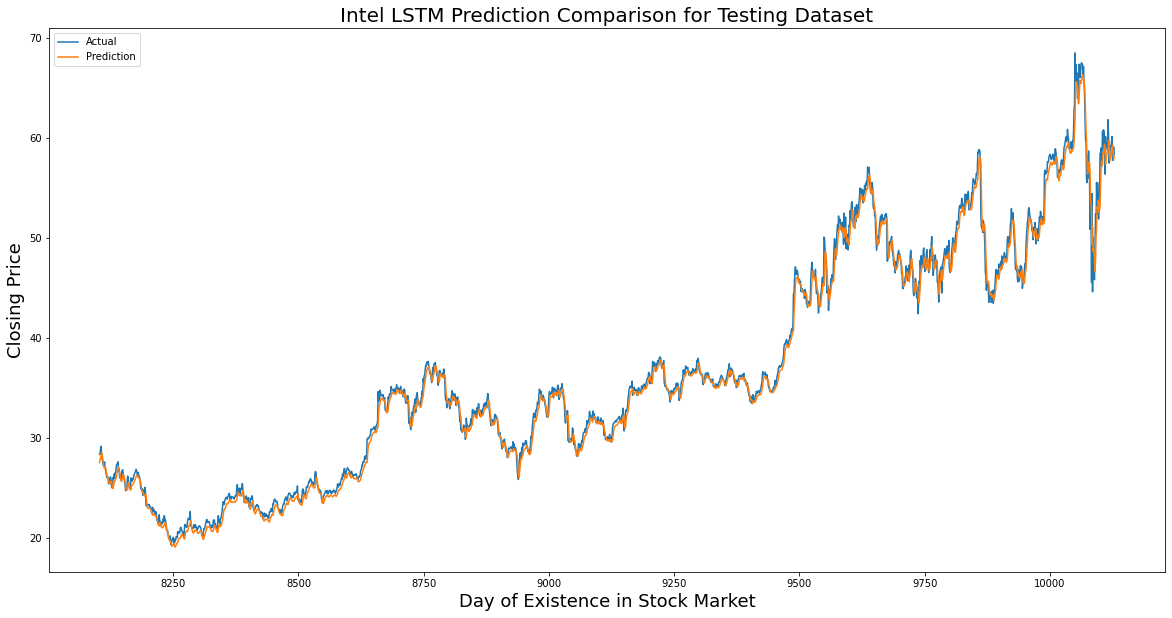

In [ ]:
# convert the data to a numpy array
intel_LSTM_x_test = np.array(intel_LSTM_x_test)

# reshape the data
intel_LSTM_x_test = np.reshape(intel_LSTM_x_test, (intel_LSTM_x_test.shape[0], intel_LSTM_x_test.shape[1], 1 ))

# Get the models predicted price values 
intel_LSTM_test_predictions = intel_model.predict(intel_LSTM_x_test)
intel_LSTM_test_predictions = scaler.inverse_transform(intel_LSTM_test_predictions)

intel_LSTM_RMSE = RMSE(intel_LSTM_test_predictions, intel_LSTM_y_test)
print("Testing LSTM RMSE for intel is", intel_LSTM_RMSE)
#predictions = scaler.inverse_transform(predictions)

test_intel['Predictions'] = intel_LSTM_test_predictions

plt.figure(figsize=(20,10))
plt.xlabel("Day of Existence in Stock Market", fontsize=18)
plt.ylabel("Closing Price", fontsize=18)
plt.title("Intel LSTM Prediction Comparison for Testing Dataset", fontsize=20)
plt.plot(test_intel['Close'], label='Actual')
plt.plot(test_intel['Predictions'], label='Prediction')
plt.legend()

In [ ]:
# finally, we run LSTM on Microsoft's data
microsoft_dataset = microsoft_data.filter(["Close"]).values

# scale our data for LSTM
scaler = MinMaxScaler(feature_range=(0,1))
microsoft_scaled_data = scaler.fit_transform(microsoft_dataset)

print(microsoft_scaled_data)

[[3.68167666e-05]
 [5.52251499e-05]
 [6.44346435e-05]
 ...
 [9.52547530e-01]
 [9.56683049e-01]
 [9.70627214e-01]]


In [ ]:
# create the scaled training data set
microsoft_LSTM_train_data = microsoft_scaled_data[0:int(microsoft_80_percent), :]

# split the data into x_train and y_train data sets
microsoft_LSTM_x_train = []
microsoft_LSTM_y_train = []

# create data in 60 timesteps
for i in range(60, len(microsoft_LSTM_train_data)):
    microsoft_LSTM_x_train.append(microsoft_LSTM_train_data[i-60:i, 0])
    microsoft_LSTM_y_train.append(microsoft_LSTM_train_data[i, 0])

In [ ]:
# convert the training sets to numpy arrays 
microsoft_LSTM_x_train, microsoft_LSTM_y_train = np.array(microsoft_LSTM_x_train), np.array(microsoft_LSTM_y_train)

# convert the data into a 3D dimension array with x_train samples, 60 timestamps, and one feature at each step
microsoft_LSTM_x_train = np.reshape(microsoft_LSTM_x_train, (microsoft_LSTM_x_train.shape[0], microsoft_LSTM_x_train.shape[1], 1))
microsoft_LSTM_x_train.shape

(6832, 60, 1)

In [ ]:
# build the LSTM model
microsoft_model = Sequential()
microsoft_model.add(LSTM(50, return_sequences=True, input_shape=(microsoft_LSTM_x_train.shape[1], 1)))
microsoft_model.add(LSTM(50, return_sequences= False))
microsoft_model.add(Dense(25))
microsoft_model.add(Dense(1))

In [ ]:
# compile the model
microsoft_model.compile(optimizer='adam', loss='mean_squared_error')

# train the model
microsoft_model.fit(microsoft_LSTM_x_train, microsoft_LSTM_y_train, batch_size=1, epochs=1)

Epoch 1/1
6832/6832 [==============================] - 262s 38ms/step - loss: 6.7337e-05


In [ ]:
# create the scaled microsoft testing data set
microsoft_LSTM_test_data = microsoft_scaled_data[microsoft_80_percent - 60: , :]
microsoft_LSTM_x_test = []
microsoft_LSTM_y_test = microsoft_dataset[microsoft_80_percent:, :]
for i in range(60, len(microsoft_LSTM_test_data)):
    microsoft_LSTM_x_test.append(microsoft_LSTM_test_data[i-60:i, 0])

Testing LSTM RMSE for Microsoft is 3.6975992775965447


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


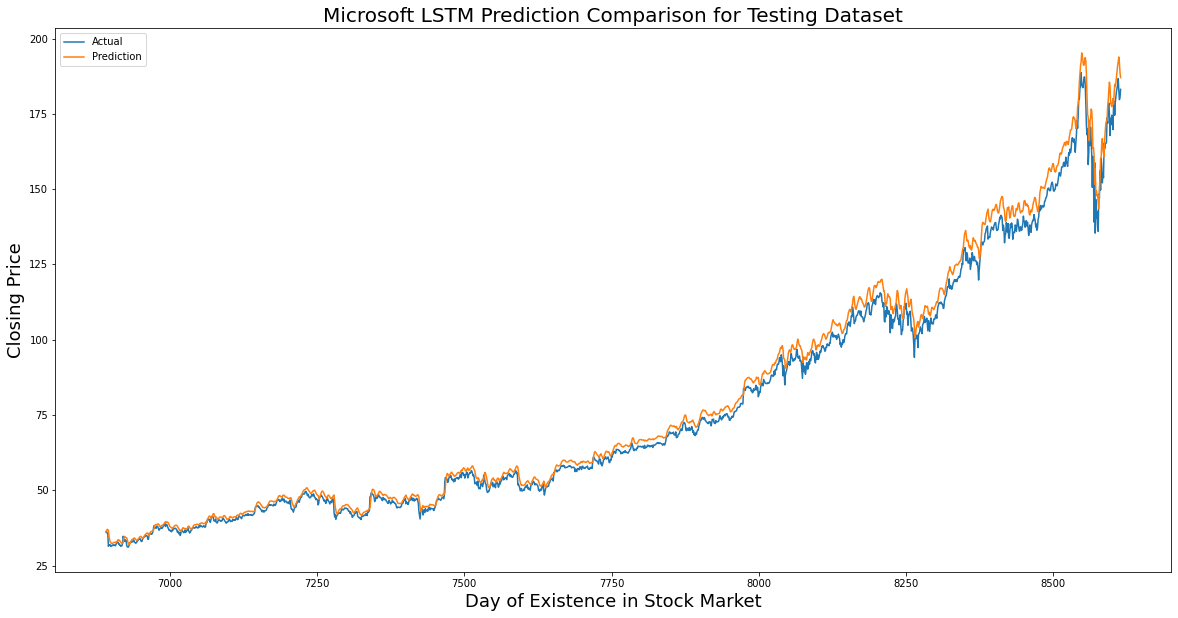

In [ ]:
# convert the data to a numpy array
microsoft_LSTM_x_test = np.array(microsoft_LSTM_x_test)

# reshape the data
microsoft_LSTM_x_test = np.reshape(microsoft_LSTM_x_test, (microsoft_LSTM_x_test.shape[0], microsoft_LSTM_x_test.shape[1], 1 ))

# Get the models predicted price values 
microsoft_LSTM_test_predictions = microsoft_model.predict(microsoft_LSTM_x_test)
microsoft_LSTM_test_predictions = scaler.inverse_transform(microsoft_LSTM_test_predictions)

microsoft_LSTM_RMSE = RMSE(microsoft_LSTM_test_predictions, microsoft_LSTM_y_test)
print("Testing LSTM RMSE for Microsoft is", microsoft_LSTM_RMSE)

test_microsoft['Predictions'] = microsoft_LSTM_test_predictions

plt.figure(figsize=(20,10))
plt.xlabel("Day of Existence in Stock Market", fontsize=18)
plt.ylabel("Closing Price", fontsize=18)
plt.title("Microsoft LSTM Prediction Comparison for Testing Dataset", fontsize=20)
plt.plot(test_microsoft['Close'], label='Actual')
plt.plot(test_microsoft['Predictions'], label='Prediction')
plt.legend()